# Implementing Custom PyTorch Dataset
## By Sergei Issaev

Welcome to my notebook introducing the use of custom PyTorch Datasets. This notebook is the source code to an article published on Medium, at https://medium.com/@sergei740. Thank you for reading, and don't forget to leave an upvote if you appreciate this content!

### Import Libraries

In [1]:
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as T
import torch
import torch.nn as nn
from torchvision.utils import make_grid
from torchvision.utils import save_image
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

### Load in the Data

In [2]:
image_size = 64
DATA_DIR = '../input/vaporarray/test.out.npy'
X_train = np.load(DATA_DIR)
print(f"Shape of training data: {X_train.shape}")
print(f"Data type: {type(X_train)}")

Shape of training data: (909, 128, 128, 3)
Data type: <class 'numpy.ndarray'>


### Convert Data to uint8

In [3]:
print(type(X_train[0][0][0][0]))

<class 'numpy.float64'>


In [4]:
data = X_train.astype(np.float64)
data = 255 * data
img = data.astype(np.uint8)
X_train = img

In [5]:
print(type(X_train[0][0][0][0]))

<class 'numpy.uint8'>


### Visualize One Example

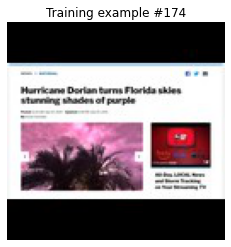

In [6]:
random_image = random.randint(0, len(X_train))
plt.imshow(X_train[random_image])
plt.title(f"Training example #{random_image}")
plt.axis('off')
plt.show()

### Create Custom Dataset

In [7]:
class vaporwaveDataset(Dataset):
    'Characterizes a dataset for PyTorch'
    def __init__(self, X):
        'Initialization'
        self.X = X

    def __len__(self):
        'Denotes the total number of samples'
        return len(self.X)

    def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample
        image = self.X[index]
        X = self.transform(image)
        return X
        
    transform = T.Compose([
        T.ToPILImage(),
        T.Resize(image_size),
        T.ToTensor()])

### Create a DataLoader

In [8]:
batch_size = 64
transformed_dataset = vaporwaveDataset(X=X_train)
train_dl = DataLoader(transformed_dataset, batch_size, shuffle=True, num_workers=3, pin_memory=True)

### Visualize Images

In [9]:
def show_images(images, nmax=64):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid((images.detach()[:nmax]), nrow=8).permute(1, 2, 0))

def show_batch(dl, nmax=64):
    for images in dl:
        show_images(images, nmax)
        break

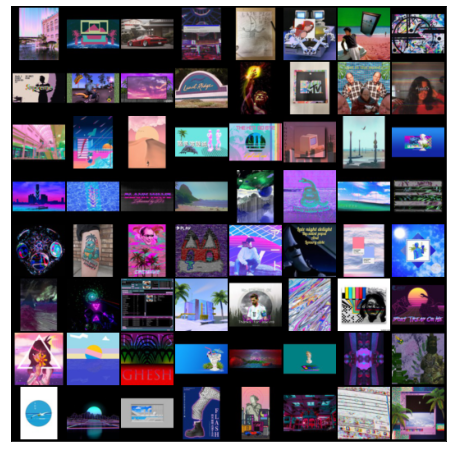

In [10]:
show_batch(train_dl)

### Compare with Different Data Augmentations

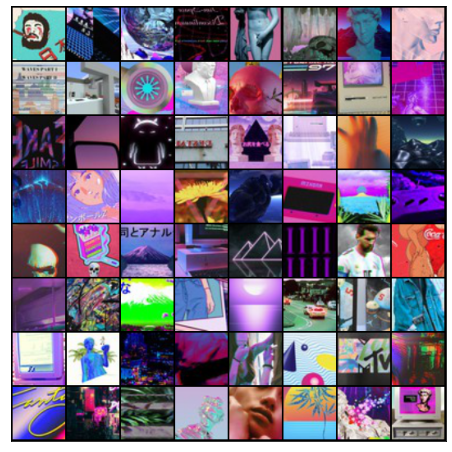

In [11]:
class croppedDataset(Dataset):
    'Characterizes a dataset for PyTorch'
    def __init__(self, ims):
        'Initialization'
        self.ims = ims

    def __len__(self):
        'Denotes the total number of samples'
        return len(self.ims)

    def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample
        image = self.ims[index]
        X = self.transform(image)
        return X
        
    transform = T.Compose([
        T.ToPILImage(),
        T.CenterCrop(0.75 * 64),
        T.Resize(image_size),
        #T.RandomResizedCrop(image_size),
        T.RandomHorizontalFlip(),
        T.ToTensor()])
    
batch_size = 64
cropped_dataset = croppedDataset(ims=X_train)
train_dl = DataLoader(cropped_dataset, batch_size, shuffle=True, num_workers=3, pin_memory=True)
show_batch(train_dl)